In [1]:
import sys
sys.path.append("/storage/vbutoi/projects/")
sys.path.append("/storage/vbutoi/libraries/")
from ionpy.analysis import ResultsLoader
import seaborn as sns
import pandas as pd
sns.set_context('talk')

sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

In [2]:
cal_exp = '03_13_24_RandomCircles_BigEnsemble_Calibrated'

path_list = [
    f"{root}/calibration/{cal_exp}/Individual_FT_CE",
    f"{root}/calibration/{cal_exp}/Individual_FT_Dice",
    f"{root}/calibration/{cal_exp}/Individual_TempScaling",
    f"{root}/calibration/{cal_exp}/Individual_IBTS",
    f"{root}/calibration/{cal_exp}/Individual_LTS",
]

df_list = []
for path in path_list:
    try:
        dfc = rs.load_configs(
            path,
            properties=False,
        )
        df = rs.load_metrics(dfc)
        df_list.append(df)
    except Exception as e:
        print(e)

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

In [3]:
df = pd.concat(df_list)

In [4]:
def calibrator(model):
    return model.split('.')[-1]

df.augment(calibrator)

In [5]:
# g = sns.relplot(
#     data=df,
#     x='epoch',
#     y='loss',
#     col='phase',
#     hue='calibrator',
#     kind='line',
#     height=12,
#     )

# # Set column spacing
# g.fig.subplots_adjust(wspace=0.05)
# # g.set(ylim=(0.0, 0.25))

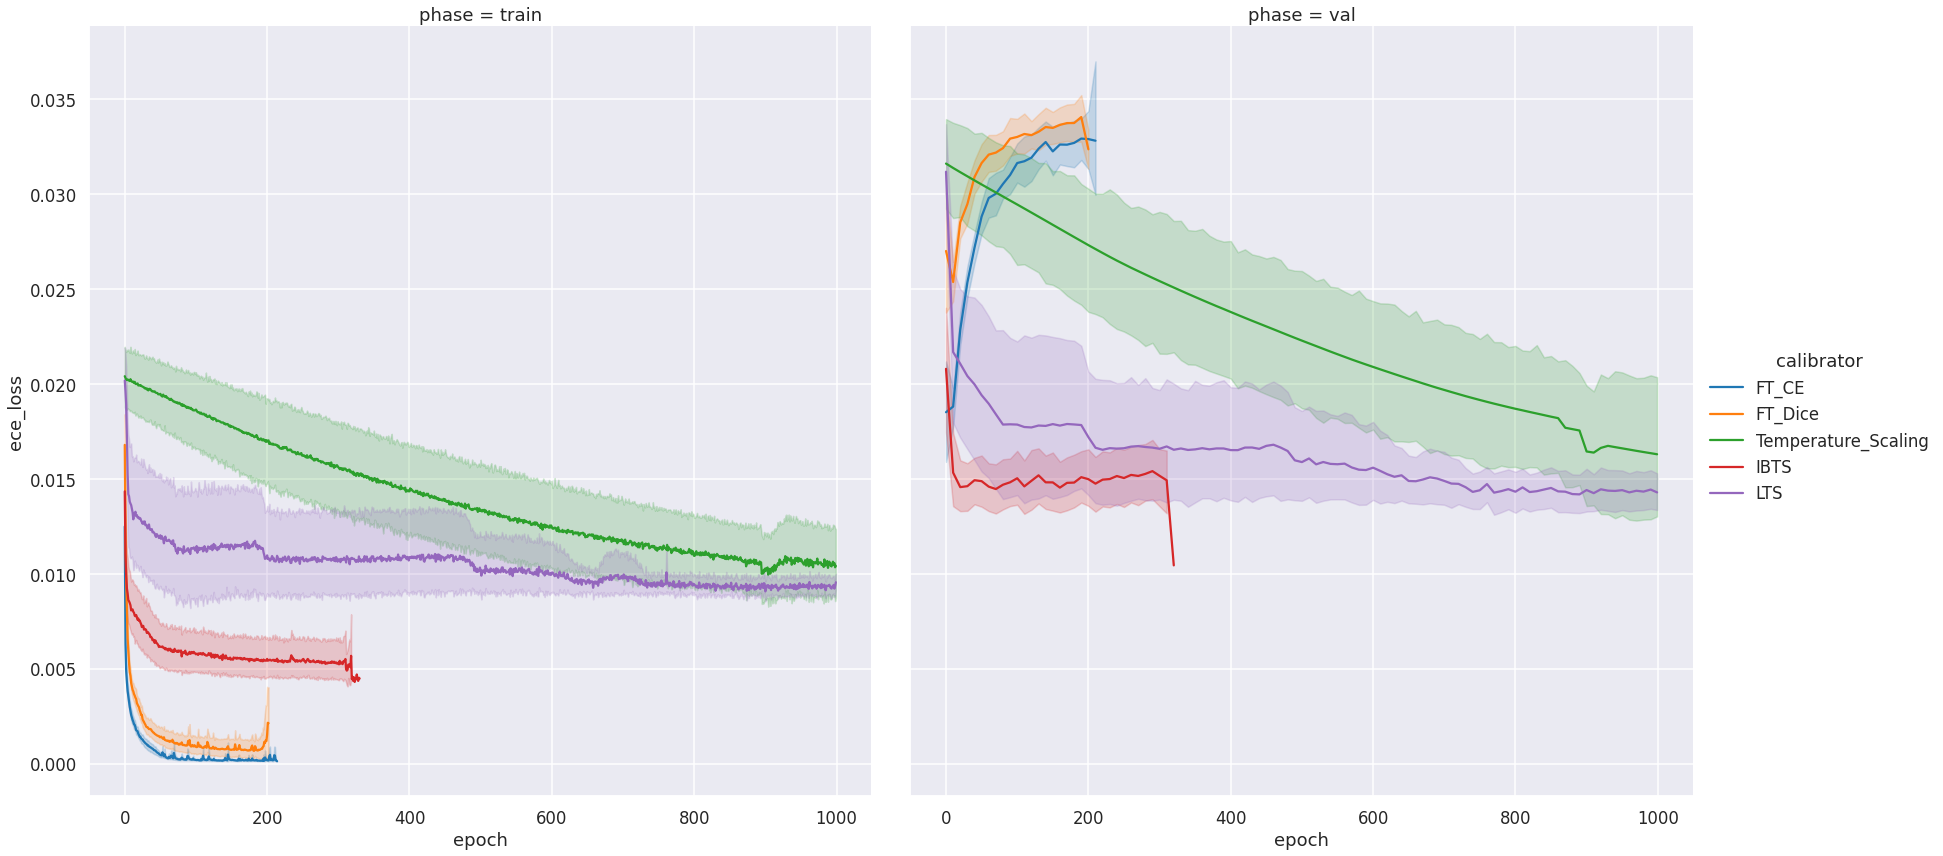

In [6]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='ece_loss',
    col='phase',
    hue='calibrator',
    kind='line',
    height=12,
    )

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))